# MobileNet

**Date:** 12-14-2020

This is an experiment regarding Covid-19 cough classification. A neural network classifier is used to differentiate between a Covid-19 positive cough vs. a Covid-19 negative cough. 

In this particular notebook, an unmodified MobileNet convolutional neural network architecture is used to classify Mel Spectrograms separated by each class (postivie, negative). 

### Mount to Google Drive, import depedencies, preprocess data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras   
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_path = '/content/drive/MyDrive/Machine Learning/projects/covid-cough-test/data/train'
test_path = '/content/drive/MyDrive/Machine Learning/projects/covid-cough-test/data/test'

In [4]:
CLASS_LIST = ['neg', 'pos']

In [5]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(225, 225), classes=CLASS_LIST, batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(225, 225), classes=CLASS_LIST, batch_size=10)

Found 109 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


### Build model

In [6]:
original_model = keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [7]:
model = Sequential()
for layer in original_model.layers: 
    model.add(layer)

model.pop()
model.add(Dense(2, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0

### Train the model

In [9]:
# import a utility library I created for modularity 
from google.colab import files
files.upload()

Saving my_keras_utils.py to my_keras_utils.py


{'my_keras_utils.py': b'"""\nFile: my_keras_utils.py \n-------------------\nIn this file, I store several useful utility functions\nI created for deep learning experiments using Keras.  \n"""\n\nimport cv2\nimport tensorflow as tf\nimport numpy as np\nimport matplotlib.pyplot as plt \nimport matplotlib.image as mpimg\n\n\ndef my_predict(model, image_path, img_size, classes):\n\t"""\n\tTakes in a file path for a singular image and a corresponding\n\tclass list and returns a prediction for that image. \n\tParameters: \n\t\t- model (Keras model): the Keras model that is to be used for the prediction \n\t\t- image_path (str): the path of the image\n\t\t- classes (list): a list of classes used in the Keras classification model \n\tReturns: \n\t\t- Predicted class \n\t\t- Probability of prediction \n\t"""\n\tshow_image(image_path)\n\tpreds = model.predict([prepare_color(image_path, img_size)])\n\tmax_prob = np.max(preds)\n\tmax_prob_index = np.argmax(preds)\n\tfinal_probability = max_prob * 

In [10]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit_generator(train_batches, steps_per_epoch=4, epochs=250, verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/250
4/4 - 4s - loss: 1.8700 - accuracy: 0.5128
Epoch 2/250
4/4 - 2s - loss: 1.0022 - accuracy: 0.6750
Epoch 3/250
4/4 - 2s - loss: 0.6853 - accuracy: 0.8250
Epoch 4/250
4/4 - 1s - loss: 0.8442 - accuracy: 0.7692
Epoch 5/250
4/4 - 1s - loss: 0.5148 - accuracy: 0.8500
Epoch 6/250
4/4 - 1s - loss: 0.4573 - accuracy: 0.9000
Epoch 7/250
4/4 - 0s - loss: 0.0115 - accuracy: 1.0000
Epoch 8/250
4/4 - 0s - loss: 0.2612 - accuracy: 0.9250
Epoch 9/250
4/4 - 1s - loss: 0.1546 - accuracy: 0.9744
Epoch 10/250
4/4 - 0s - loss: 0.0817 - accuracy: 0.9487
Epoch 11/250
4/4 - 0s - loss: 0.1046 - accuracy: 0.9500
Epoch 12/250
4/4 - 0s - loss: 0.1150 - accuracy: 0.9750
Epoch 13/250
4/4 - 0s - loss: 0.0427 - accuracy: 0.9750
Epoch 14/250
4/4 - 0s - loss: 0.0700 - accuracy: 0.9487
Epoch 15/250
4/4 - 0s - loss: 0.0263 - accuracy: 1.0000
Epoch 16/250
4/4 - 0s - loss: 0.0161 - accuracy: 1.0000
Epoch 17/250
4/4 - 0s - loss: 0.0674 

In [12]:
history_dict = history.history
print(history_dict.keys())
# to keep for later 
%store history_dict

dict_keys(['loss', 'accuracy'])
Stored 'history_dict' (dict)


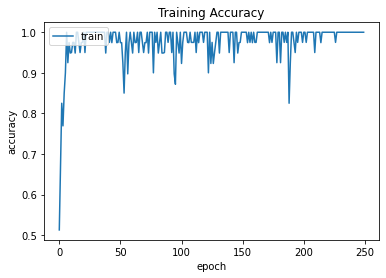

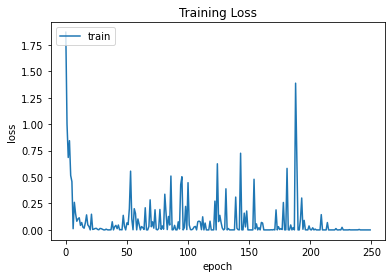

In [13]:
from my_keras_utils import plot_training
plot_training(history_dict)

#### Save the model

In [18]:
%cd '/content/drive/MyDrive/Machine Learning/projects/covid-cough-test'

/content/drive/MyDrive/Machine Learning/projects/covid-cough-test


In [19]:
# Save the entire model to a separate google drive folder
!mkdir -p saved_models 
notebook_name ='MobileNet' # no '/' 
u_string = 'saved_models/' + notebook_name
model.save(u_string)

INFO:tensorflow:Assets written to: saved_models/MobileNet/assets


### Test

In [16]:
test_results = model.evaluate(test_batches)

2/2 [==============================] - 1s 271ms/step - loss: 1.4571 - accuracy: 0.8333


In [17]:
model.metrics_names
test_results

[1.45711088180542, 0.8333333134651184]

The model's accuracy on the test set is **83.3%** 

### Predictions

In [20]:
from my_keras_utils import my_predict

#### Negative 

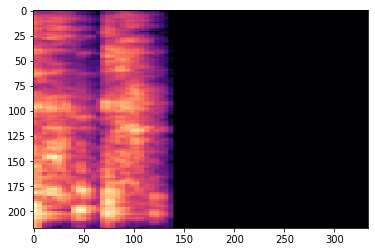

The class is pos predicted with a probability of 99.99998807907104 which rounds to 100.0%


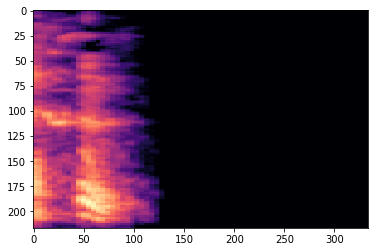

The class is neg predicted with a probability of 99.9998688697815 which rounds to 100.0%


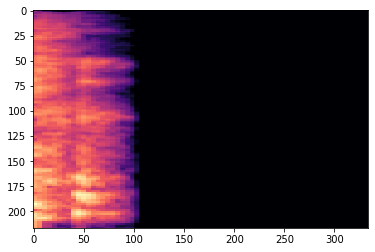

The class is neg predicted with a probability of 99.99276399612427 which rounds to 99.99%


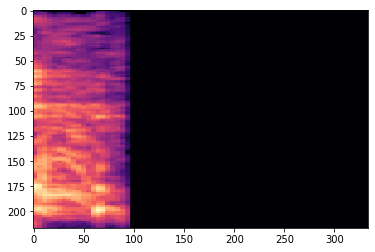

The class is pos predicted with a probability of 87.42170333862305 which rounds to 87.42%


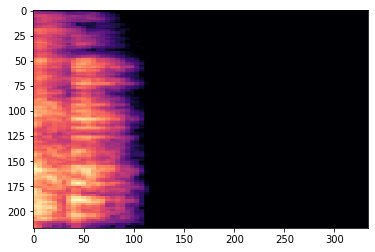

The class is neg predicted with a probability of 99.52789545059204 which rounds to 99.53%


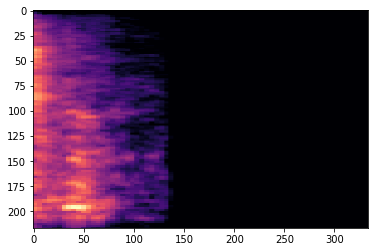

The class is neg predicted with a probability of 99.99167919158936 which rounds to 99.99%


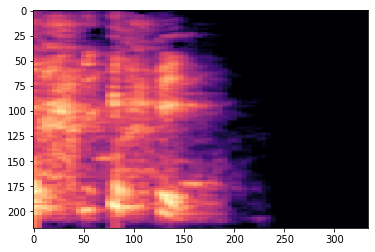

The class is pos predicted with a probability of 99.55546259880066 which rounds to 99.56%


In [22]:
neg_img_paths = ['/content/drive/MyDrive/Machine Learning/projects/covid-cough-test/data/test/neg/67.png', 
                      '/content/drive/MyDrive/Machine Learning/projects/covid-cough-test/data/test/neg/68.png',
                      '/content/drive/MyDrive/Machine Learning/projects/covid-cough-test/data/test/neg/69.png', 
                 '/content/drive/MyDrive/Machine Learning/projects/covid-cough-test/data/test/neg/70.png', 
                 '/content/drive/MyDrive/Machine Learning/projects/covid-cough-test/data/test/neg/71.png', 
                 '/content/drive/MyDrive/Machine Learning/projects/covid-cough-test/data/test/neg/72.png', 
                 '/content/drive/MyDrive/Machine Learning/projects/covid-cough-test/data/test/neg/73.png']

for img in neg_img_paths:
  my_predict(model, img, 225, CLASS_LIST)

**4/7**

#### Positive 

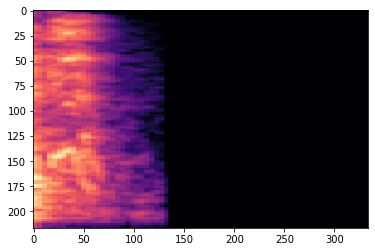

The class is pos predicted with a probability of 99.99878406524658 which rounds to 100.0%


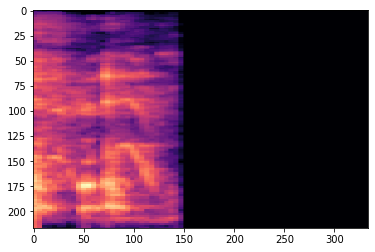

The class is pos predicted with a probability of 100.0 which rounds to 100.0%


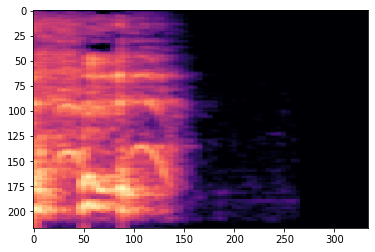

The class is pos predicted with a probability of 99.99994039535522 which rounds to 100.0%


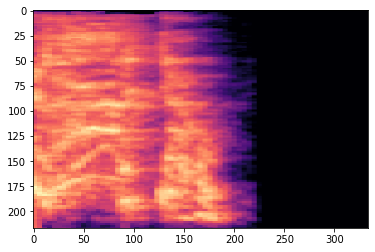

The class is pos predicted with a probability of 99.99988079071045 which rounds to 100.0%


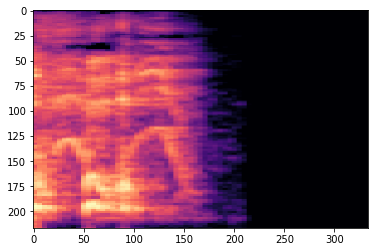

The class is pos predicted with a probability of 99.99996423721313 which rounds to 100.0%


In [23]:
pos_img_paths = ['/content/drive/MyDrive/Machine Learning/projects/covid-cough-test/data/test/pos/44.png', 
                      '/content/drive/MyDrive/Machine Learning/projects/covid-cough-test/data/test/pos/45.png',
                      '/content/drive/MyDrive/Machine Learning/projects/covid-cough-test/data/test/pos/46.png', 
                 '/content/drive/MyDrive/Machine Learning/projects/covid-cough-test/data/test/pos/47.png', 
                 '/content/drive/MyDrive/Machine Learning/projects/covid-cough-test/data/test/pos/48.png']

for img in pos_img_paths:
  my_predict(model, img, 225, CLASS_LIST)

**5/5**

#### Analysis  

Overall, it seems that the trained model performs well on positive samples, but not as well on negative samples. 

##### Confusion matrix 

In [47]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

In [48]:
y_true = ['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos']
y_pred = ['pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos']

In [49]:
cm = confusion_matrix(y_true, y_pred, labels=CLASS_LIST)

The following function was obtained from: https://www.youtube.com/watch?v=km7pxKy4UHU 

In [50]:
def plot_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astypea('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix without normalization')

  print(cm)

  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix without normalization
[[4 3]
 [0 5]]


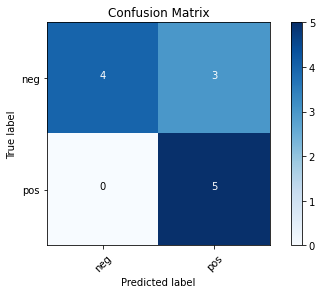

In [51]:
# plot the CM
plot_cm(cm, CLASS_LIST, title='Confusion Matrix')

##### Classification report 

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=CLASS_LIST))

              precision    recall  f1-score   support

         neg       1.00      0.57      0.73         7
         pos       0.62      1.00      0.77         5

    accuracy                           0.75        12
   macro avg       0.81      0.79      0.75        12
weighted avg       0.84      0.75      0.74        12

